# Apply inferential statistics

### Preliminaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

### Load Data Sets

In [2]:
tb1 = pd.read_csv('table_1.csv', index_col=None)
tb2 = pd.read_csv('table_2.csv', index_col=None)

### Statistical Analysis

### * Is the life expectancy of males less than females

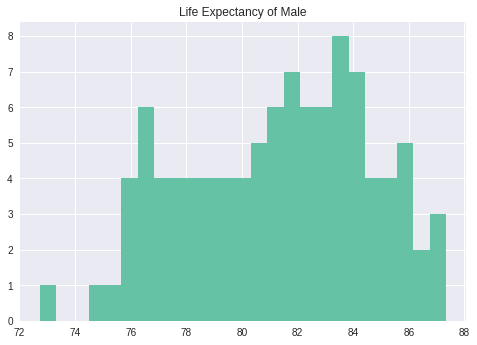

In [3]:
# distrabution of life expectancy of male
tb1_m = tb1[tb1.gnd == 'M']
plt.hist(tb1_m.le_raceadj, bins=25, color=sns.color_palette("Set2", 1))
plt.title('Life Expectancy of Male')
plt.show()

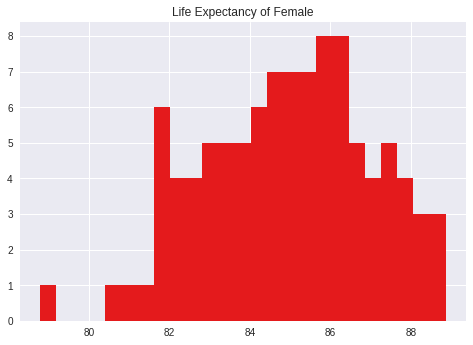

In [4]:
# distrabution of life expectancy of female
tb1_f = tb1[tb1.gnd == 'F']
plt.hist(tb1_f.le_raceadj, bins=25, color=sns.color_palette("Set1", 1))
plt.title('Life Expectancy of Female')
plt.show()

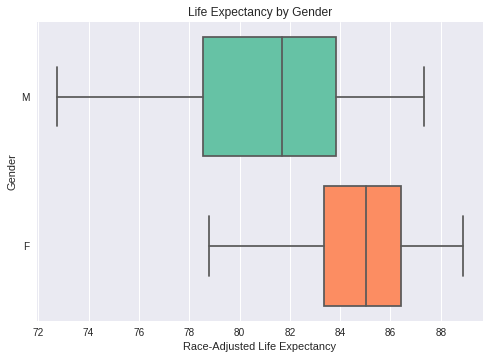

In [5]:
# Boxplot of life expectancy, male and female
sns.boxplot(tb1.le_raceadj, tb1.gnd, order=["M", "F"], palette="Set2", saturation=1)
plt.ylabel('Gender')
plt.xlabel('Race-Adjusted Life Expectancy')
plt.title('Life Expectancy by Gender')
plt.show()

__1. Setup an appropriate hypothesis test.__

Null hypothesis: Mean life expectancy of males are same as mean life expectancy of females  
**H0:** Mean life expectancy of males = mean life expectancy of females   
**H1:** Mean life expectancy of males < mean life expectancy of females     

In [6]:
import scipy.stats as st
import statsmodels.stats.api as sms
import math

__2. Statistical significance for α = .01.__

In [7]:
# standard error of the mean for males sample
sem_m = st.sem(tb1_m.le_raceadj)
sem_m

0.33295344003414468

In [8]:
# standard error of the mean for females sample
sem_f = st.sem(tb1_f.le_raceadj)
sem_f

0.21049699543147696

In [9]:
sem = math.sqrt(sem_m*sem_m + sem_f*sem_f)
sem

0.3939123992923427

If H0 is right, mean life expectancy of males = mean life expectancy of females, sample mean difference equals to 0

In [10]:
mu0 = 0

In [11]:
# Confidence interval
# From Z table, for conficence of 99%, z_score=2.33
z0 = 2.33
# margin of error
me = mu0 + z0 * sem
me

0.9178158903511585

So if null hypothesis is right, we have 99% confidence that the difference of mean life expectancy between females and males is less than 0.92

__3. Pracical significance value (or p-value)__

In [12]:
# mean life expectancy of males
le_m = tb1_m.le_raceadj.mean()
le_m

81.2616193

In [13]:
# mean life expectancy of females
le_f = tb1_f.le_raceadj.mean()
le_f

84.9237924

In [14]:
# mean difference
mu = le_f - le_m
mu

3.6621730999999897

In [15]:
# Practical significance
# actural z
z = mu / sem
z

9.296922631983723

In [16]:
# p-value
# From Z table, for z_score=9.297, p(z<9.297)=1
p_value = 1 - 1
p_value

0

__4. Conclusion__

So if null hypothesis is right, we only have 0% probability to have the actural sample mean difference of callback rate. null hypothesis is rejected.  
Mean life expectancy of males are lower than that of females.

### * Relationship between Life Expectancy and Household Income

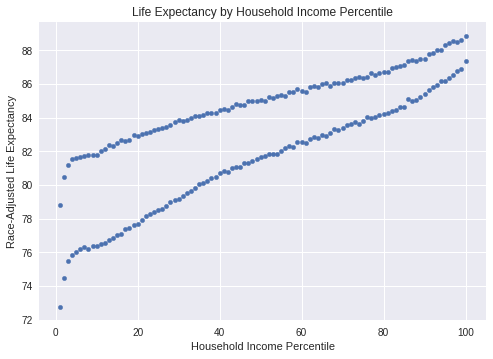

In [17]:
# distrabution of life expectancy
tb1.plot(kind='scatter', x='pctile', y='le_raceadj')
plt.xlabel('Household Income Percentile')
plt.ylabel('Race-Adjusted Life Expectancy')
plt.title('Life Expectancy by Household Income Percentile')
plt.show()

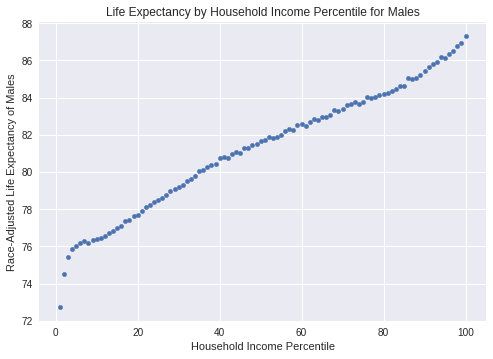

In [18]:
# distrabution of males life expectancy
tb1_m.plot(kind='scatter', x='pctile', y='le_raceadj')
plt.xlabel('Household Income Percentile')
plt.ylabel('Race-Adjusted Life Expectancy of Males')
plt.title('Life Expectancy by Household Income Percentile for Males')
plt.show()

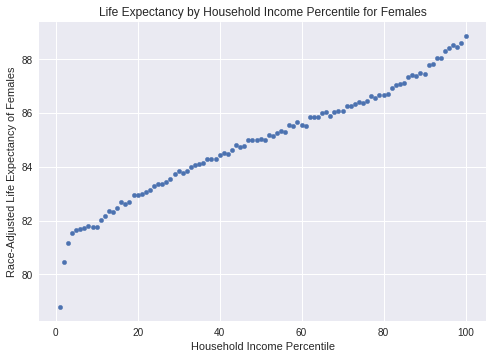

In [19]:
# distrabution of females life expectancy
tb1_f.plot(kind='scatter', x='pctile', y='le_raceadj')
plt.xlabel('Household Income Percentile')
plt.ylabel('Race-Adjusted Life Expectancy of Females')
plt.title('Life Expectancy by Household Income Percentile for Females')
plt.show()

In [20]:
# linear regression of males
slope, intercept, r_value, p_value, std_err = st.linregress(tb1_m.pctile, tb1_m.le_raceadj)
slope, intercept, r_value, p_value, std_err

(0.11372064380438045,
 75.518726787878791,
 0.99089096207703509,
 3.7721797415771969e-87,
 0.0015612066669566265)

In [21]:
# coefficient of determination (r_squared) for males
print("correlation coefficient:", r_value)
print("r-squared:", r_value*r_value)

correlation coefficient: 0.990890962077
r-squared: 0.981864898726


In [22]:
# linear regression of females
slope, intercept, r_value, p_value, std_err = st.linregress(tb1_f.pctile, tb1_f.le_raceadj)
slope, intercept, r_value, p_value, std_err

(0.071546892049204974,
 81.310674351515175,
 0.98608632409696495,
 3.4812969182987077e-78,
 0.001218380112536754)

In [23]:
# coefficient of determination (r_squared) for females
print("correlation coefficient:", r_value)
print("r-squared:", r_value*r_value)

correlation coefficient: 0.986086324097
r-squared: 0.972366238571


So life expectanct has big relationship with household income for both males and females.